In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import glob

In [70]:


# 1) Define the folder containing your CSVs
folder = os.path.expanduser("~/Downloads/archive")  # change to your path

# 2) Use glob to grab every “.csv” file in that folder
pattern = os.path.join(folder, "*.csv")
csv_files = glob.glob(pattern)

# 3) Read them all into a list of DataFrames
dfs = [pd.read_csv(fp, low_memory=False) for fp in csv_files]




# 5) Quick check
print(f"Found {len(csv_files)} files, combined shape: {combined.shape}")



Found 7 files, combined shape: (178405, 57)


In [71]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,no,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,no,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,no,False


In [72]:
df.tail()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
128963,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,517.0,HYDERABAD,TELANGANA,500013.0,no,False
128964,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,999.0,GURUGRAM,HARYANA,122004.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
128965,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,690.0,HYDERABAD,TELANGANA,500049.0,no,False
128966,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,1199.0,Halol,Gujarat,389350.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
128967,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,S,B0894X27FC,Shipped,1,696.0,Raipur,CHHATTISGARH,492014.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128968 entries, 0 to 128967
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128968 non-null  object 
 1   Date                128968 non-null  object 
 2   Status              128968 non-null  object 
 3   Fulfilment          128968 non-null  object 
 4   Sales Channel       128968 non-null  object 
 5   ship-service-level  128968 non-null  object 
 6   Style               128968 non-null  object 
 7   SKU                 128968 non-null  object 
 8   Category            128968 non-null  object 
 9   Size                128968 non-null  object 
 10  ASIN                128968 non-null  object 
 11  Courier Status      128968 non-null  object 
 12  Qty                 128968 non-null  int64  
 13  Amount              128968 non-null  float64
 14  ship-city           128968 non-null  object 
 15  ship-state          128968 non-nul

In [74]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'Amount', 'ship-city', 'ship-state',
       'ship-postal-code', 'promotion-ids', 'B2B'],
      dtype='object')

In [75]:
df.describe()

,Qty,Amount
count,128968.000000,128968.000000
mean,0.904449,609.372529
std,0.313331,313.336473
min,0.000000,0.000000
25%,1.000000,413.000000
50%,1.000000,583.000000
75%,1.000000,771.000000
max,15.000000,5584.000000


In [76]:
df.describe(include='O')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,ship-city,ship-state,ship-postal-code,promotion-ids
count,128968,128968,128968,128968,128968,128968,128968,128968,128968,128968,128968,128968,128968,128968,128968.0,128968
unique,120378,91,13,2,2,2,1377,7195,9,11,7190,4,8956,70,9460.0,5788
top,403-4984515-8861958,05-03-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,BENGALURU,MAHARASHTRA,201301.0,no
freq,12,2083,77800,89691,128844,88608,4224,773,50281,22709,773,109483,11216,22259,1006.0,49150


In [77]:
df.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
promotion-ids         0
B2B                   0
dtype: int64

In [78]:
df.nunique().to_frame(name='Count of unique values')

,Count of unique values
Order ID,120378
Date,91
Status,13
Fulfilment,2
Sales Channel,2
ship-service-level,2
Style,1377
SKU,7195
Category,9
Size,11


In [79]:
df.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
Order ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
Date,"[04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26..."
Status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
Fulfilment,"[Merchant, Amazon]"
Sales Channel,"[Amazon.in, Non-Amazon]"
ship-service-level,"[Standard, Expedited]"
Style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
SKU,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
Category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."
Size,"[S, 3XL, XL, L, XXL, XS, 6XL, M, 4XL, 5XL, Free]"


In [80]:
# 1) Clean up any stray spaces in your column names
df.columns = df.columns.str.strip()

# 2) Define the list of columns you *intend* to drop
cols_to_drop = ['index', 'Unnamed: 22', 'fulfilled-by', 'ship-country', 'currency']

# 3) Only keep those that are actually present, then drop them
existing = [c for c in cols_to_drop if c in df.columns]
df.drop(columns=existing, inplace=True)


In [81]:
df.columns = df.columns.str.strip() 

In [82]:
df

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,no,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,no,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128963,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,517.00,HYDERABAD,TELANGANA,500013.0,no,False
128964,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,999.00,GURUGRAM,HARYANA,122004.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
128965,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,690.00,HYDERABAD,TELANGANA,500049.0,no,False
128966,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,1199.00,Halol,Gujarat,389350.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False


In [83]:
df[df.duplicated(['Order ID','ASIN'], keep=False)]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B


In [84]:
df.drop_duplicates(['Order ID','ASIN'],inplace = True,ignore_index=True)

In [85]:
df

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,no,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,no,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128963,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,517.00,HYDERABAD,TELANGANA,500013.0,no,False
128964,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,999.00,GURUGRAM,HARYANA,122004.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
128965,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,690.00,HYDERABAD,TELANGANA,500049.0,no,False
128966,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,1199.00,Halol,Gujarat,389350.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False


In [86]:
df.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
promotion-ids         0
B2B                   0
dtype: int64

In [87]:
df["Courier Status"]

0         unknown
1         Shipped
2         Shipped
3         unknown
4         Shipped
           ...   
128963    Shipped
128964    Shipped
128965    Shipped
128966    Shipped
128967    Shipped
Name: Courier Status, Length: 128968, dtype: object

In [88]:
df['Courier Status'].fillna('unknown',inplace=True)

In [89]:
df["Courier Status"]

0         unknown
1         Shipped
2         Shipped
3         unknown
4         Shipped
           ...   
128963    Shipped
128964    Shipped
128965    Shipped
128966    Shipped
128967    Shipped
Name: Courier Status, Length: 128968, dtype: object

In [90]:
df["Amount"]

0          647.62
1          406.00
2          329.00
3          753.33
4          574.00
           ...   
128963     517.00
128964     999.00
128965     690.00
128966    1199.00
128967     696.00
Name: Amount, Length: 128968, dtype: float64

In [91]:
df['Amount'].fillna(0,inplace=True)

In [92]:
df["promotion-ids"]

0                                                        no
1         Amazon PLCC Free-Financing Universal Merchant ...
2              IN Core Free Shipping 2015/04/08 23-48-5-108
3                                                        no
4                                                        no
                                ...                        
128963                                                   no
128964         IN Core Free Shipping 2015/04/08 23-48-5-108
128965                                                   no
128966         IN Core Free Shipping 2015/04/08 23-48-5-108
128967         IN Core Free Shipping 2015/04/08 23-48-5-108
Name: promotion-ids, Length: 128968, dtype: object

In [93]:
df['promotion-ids'].fillna('no',inplace=True)

In [94]:
df.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
promotion-ids         0
B2B                   0
dtype: int64

In [95]:
df["ship-city"]

0              MUMBAI
1           BENGALURU
2         NAVI MUMBAI
3          PUDUCHERRY
4             CHENNAI
             ...     
128963      HYDERABAD
128964       GURUGRAM
128965      HYDERABAD
128966          Halol
128967         Raipur
Name: ship-city, Length: 128968, dtype: object

In [96]:
df['ship-city'].fillna('unknown', inplace = True)


In [97]:

df['ship-state'].fillna('unknown', inplace = True)


/var/folders/kv/pk374tbj0m17370hhh2p4kw80000gn/T/ipykernel_2201/2421501336.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ship-state'].fillna('unknown', inplace = True)


In [98]:

df['ship-postal-code'].fillna('unknown', inplace = True)

/var/folders/kv/pk374tbj0m17370hhh2p4kw80000gn/T/ipykernel_2201/523218254.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ship-postal-code'].fillna('unknown', inplace = True)


In [99]:
df.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
promotion-ids         0
B2B                   0
dtype: int64

In [100]:
df

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,no,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,no,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128963,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,517.00,HYDERABAD,TELANGANA,500013.0,no,False
128964,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,999.00,GURUGRAM,HARYANA,122004.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
128965,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,690.00,HYDERABAD,TELANGANA,500049.0,no,False
128966,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,1199.00,Halol,Gujarat,389350.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128968 entries, 0 to 128967
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128968 non-null  object 
 1   Date                128968 non-null  object 
 2   Status              128968 non-null  object 
 3   Fulfilment          128968 non-null  object 
 4   Sales Channel       128968 non-null  object 
 5   ship-service-level  128968 non-null  object 
 6   Style               128968 non-null  object 
 7   SKU                 128968 non-null  object 
 8   Category            128968 non-null  object 
 9   Size                128968 non-null  object 
 10  ASIN                128968 non-null  object 
 11  Courier Status      128968 non-null  object 
 12  Qty                 128968 non-null  int64  
 13  Amount              128968 non-null  float64
 14  ship-city           128968 non-null  object 
 15  ship-state          128968 non-nul

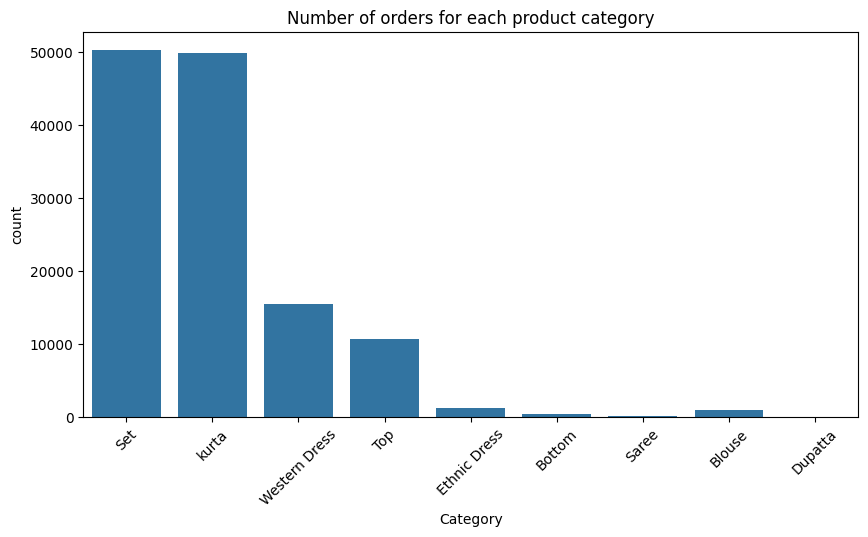

In [102]:

plt.figure(figsize=(10,5))
sns.countplot(x='Category', data=df) 
plt.xticks(rotation=45)
plt.title('Number of orders for each product category')
plt.show()

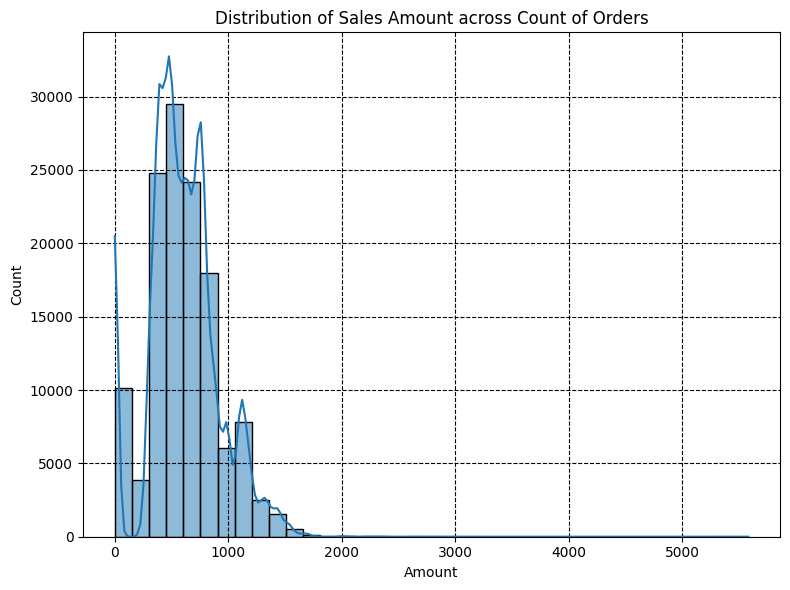

In [104]:
fig, my_ax = plt.subplots(figsize=(8,6))

sns.histplot(data =df['Amount'], ax=my_ax, binwidth=150, kde=True)
plt.grid(linestyle='--',color='#000000')
plt.title("Distribution of Sales Amount across Count of Orders")
plt.tight_layout()

/var/folders/kv/pk374tbj0m17370hhh2p4kw80000gn/T/ipykernel_2201/4290154467.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  highely_profitable = sns.barplot(x="Category", y="Amount", data=df_filtered, ci=False)


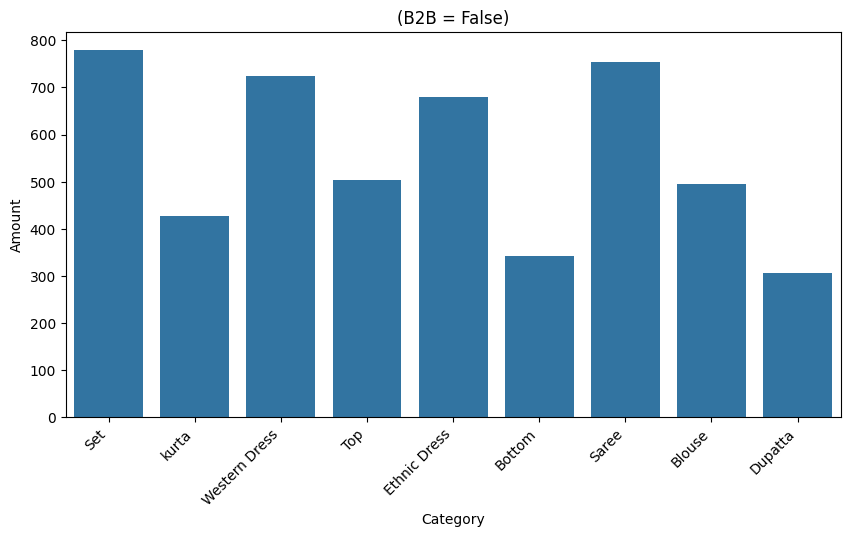

In [105]:


df_filtered = df[df['B2B'] == False]

plt.figure(figsize=(10,5))
highely_profitable = sns.barplot(x="Category", y="Amount", data=df_filtered, ci=False)


plt.setp(highely_profitable.get_xticklabels(), rotation=45, horizontalalignment='right')


plt.title("(B2B = False)")


plt.show()
